### Importação dos dados



In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
path_1 = Path('base-de-dados-challenge-1\loja_1.csv')
path_2 = Path('base-de-dados-challenge-1\loja_2.csv')
path_3 = Path('base-de-dados-challenge-1\loja_3.csv')
path_4 = Path('base-de-dados-challenge-1\loja_4.csv')

loja_1 = pd.read_csv(path_1)
loja_2 = pd.read_csv(path_2)
loja_3 = pd.read_csv(path_3)
loja_4 = pd.read_csv(path_4)

In [15]:
loja_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2358 non-null   object 
 1   Categoria do Produto    2358 non-null   object 
 2   Preço                   2358 non-null   float64
 3   Frete                   2358 non-null   float64
 4   Data da Compra          2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Local da compra         2358 non-null   object 
 7   Avaliação da compra     2358 non-null   int64  
 8   Tipo de pagamento       2358 non-null   object 
 9   Quantidade de parcelas  2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


# 1. Análise do faturamento


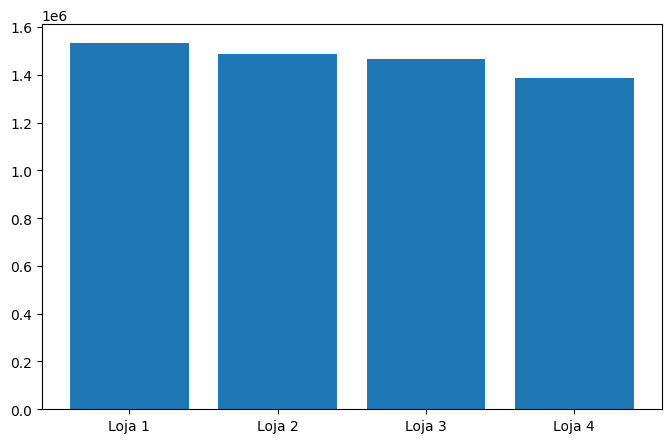

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [32]:
lista_lojas = [loja_1, loja_2, loja_3, loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamento_lojas = pd.DataFrame(columns=['Loja', 'Faturamento'])

for nome, loja in zip(nomes_lojas, lista_lojas):
    faturamento = round(loja['Preço'].sum(), 2)
    df_aux = pd.DataFrame({'Loja': [nome], 'Faturamento': [faturamento]})

    if faturamento_lojas.empty:
        faturamento_lojas = df_aux
    else:
        faturamento_lojas = pd.concat([faturamento_lojas, df_aux], ignore_index=True)

plt.figure(figsize=(8, 5))
plt.bar(
    x = faturamento_lojas['Loja'],
    height = faturamento_lojas['Faturamento']
)

plt.show()
faturamento_lojas

# 2. Vendas por Categoria


In [35]:
lista_lojas = [loja_1, loja_2, loja_3, loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, loja in zip(nomes_lojas, lista_lojas):
    loja['Loja'] = nome

dataset_consolidado = pd.concat(lista_lojas)

vendas_categoria = dataset_consolidado.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index()
vendas_categoria

,Loja,Categoria do Produto,Preço
0,Loja 1,brinquedos,23993.78
1,Loja 1,eletrodomesticos,484913.36
2,Loja 1,eletronicos,572659.23
3,Loja 1,esporte e lazer,52387.55
4,Loja 1,instrumentos musicais,121731.69
5,Loja 1,livros,11713.92
6,Loja 1,moveis,250178.11
7,Loja 1,utilidades domesticas,16931.48
8,Loja 2,brinquedos,21262.21
9,Loja 2,eletrodomesticos,464758.13


In [44]:
lojas = vendas_categoria['Loja'].unique().tolist()

acima_media = pd.DataFrame()

for loja in lojas:
    df_aux = vendas_categoria.query('Loja == @loja')
    media = df_aux['Preço'].mean()
    categorias_acima_media = df_aux.query('Preço > @media').sort_values('Preço', ascending=False).round(2)

    if acima_media.empty:
        acima_media = categorias_acima_media
    else:
        acima_media = pd.concat([acima_media, categorias_acima_media], ignore_index=True)

acima_media = acima_media.pivot(
    columns = 'Categoria do Produto',
    index = 'Loja',
    values = 'Preço'
)

acima_media

Categoria do Produto,eletrodomesticos,eletronicos,moveis
Loja,,,
Loja 1,484913.36,572659.23,250178.11
Loja 2,464758.13,547773.71,235234.68
Loja 3,438984.89,547699.92,268095.56
Loja 4,377680.65,545966.86,256705.65


# 3. Média de Avaliação das Lojas

In [ ]:
lista_lojas = [loja_1, loja_2, loja_3, loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, loja in zip(nomes_lojas, lista_lojas):
    loja['Loja'] = nome

dataset_consolidado = pd.concat(lista_lojas)

media_lojas = dataset_consolidado.groupby(['Loja'])['Avaliação da compra'].mean().reset_index().round(2)
media_lojas

,Loja,Avaliação da compra
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [66]:
lista_lojas = [loja_1, loja_2, loja_3, loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, loja in zip(nomes_lojas, lista_lojas):
    loja['Loja'] = nome

dataset_consolidado = pd.concat(lista_lojas)

produtos = dataset_consolidado.groupby(['Loja', 'Produto'])['Preço'].count().reset_index().round(2).rename(columns={'Preço': 'Quantidade'})
produtos

,Loja,Produto,Quantidade
0,Loja 1,Assistente virtual,40
1,Loja 1,Bateria,53
2,Loja 1,Bicicleta,54
3,Loja 1,Blocos de montar,56
4,Loja 1,Bola de basquete,55
...,...,...,...
199,Loja 4,Sofá retrátil,47
200,Loja 4,TV Led UHD 4K,40
201,Loja 4,Tablet ABXY,45
202,Loja 4,Violão,37


In [68]:
produto_mais_vendido = produtos.loc[
    produtos.groupby('Loja')['Quantidade'].idxmax()
].reset_index(drop=True)
produto_mais_vendido = produto_mais_vendido[['Loja', 'Produto']].rename(
    columns={'Produto': 'Produto_Mais_Vendido'}
)

produto_menos_vendido = produtos.loc[
    produtos.groupby('Loja')['Quantidade'].idxmin()
].reset_index(drop=True)
produto_menos_vendido = produto_menos_vendido[['Loja', 'Produto']].rename(
    columns={'Produto': 'Produto_Menos_vendido'}
)

resultado = pd.merge(produto_mais_vendido, produto_menos_vendido, on='Loja')
resultado

,Loja,Produto_Mais_Vendido,Produto_Menos_vendido
0,Loja 1,Guarda roupas,Celular ABXY
1,Loja 2,Iniciando em programação,Jogo de tabuleiro
2,Loja 3,Kit banquetas,Blocos de montar
3,Loja 4,Cama box,Guitarra


# 5. Frete Médio por Loja


In [63]:
lista_lojas = [loja_1, loja_2, loja_3, loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, loja in zip(nomes_lojas, lista_lojas):
    loja['Loja'] = nome

dataset_consolidado = pd.concat(lista_lojas)

media_lojas_frete = dataset_consolidado.groupby(['Loja'])['Frete'].mean().reset_index().round(2)
media_lojas_frete

,Loja,Frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28
